In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.set_printoptions(threshold='nan', precision=6, suppress=True)

In [5]:
df_one = pd.read_csv('../output/expr_1_basic_09-22.csv', comment='#')
df_one.fillna("", inplace=True)

In [6]:
df_one.head()

,Nth,R,State,lambda,Aver_N,VN_Entropy,Helstrom,Chernoff,S_opt,A_N,B_N,ra,rb
0,0.1,0.01,TMSS,0.099504,0.020000,0.056102,0.495279,0.499957,0.500273,0.010000,0.010000,,
1,0.1,0.01,PS,0.099504,0.039804,0.168732,0.490605,0.499839,0.500273,0.019902,0.019902,,
2,0.1,0.01,PA,0.099504,1.039804,0.168732,0.485689,0.499632,0.498223,0.519902,0.519902,,
3,0.1,0.01,PAS,0.099504,1.150064,0.439049,0.474331,0.498892,0.499102,0.575032,0.575032,,
4,0.1,0.01,PSA,0.099504,0.150064,0.439049,0.481975,0.499450,0.500273,0.075032,0.075032,,


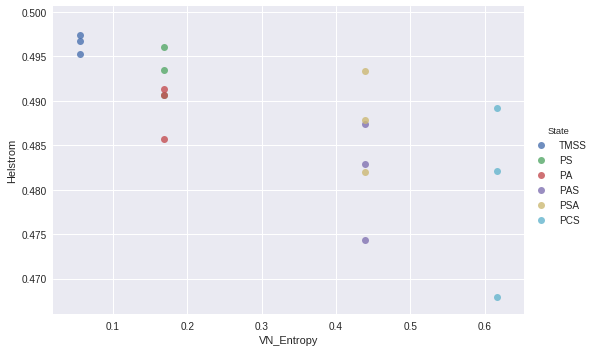

In [7]:
sns.lmplot(x='VN_Entropy', y='Helstrom', data=df_one, 
           hue='State', fit_reg=False, aspect=1.5)

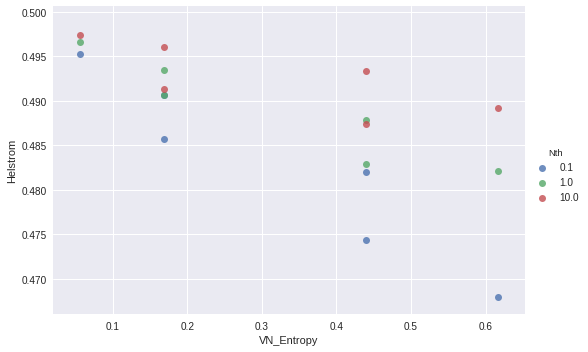

In [8]:
sns.lmplot(x='VN_Entropy', y='Helstrom', data=df_one, 
           hue='Nth', fit_reg=False, aspect=1.5)

In [9]:
def upper_bound(QCB, M):
    """ Upper bound (Quantum Chernoff bound) of the error probability
        using s = 1/2
    """
    return 0.5 * QCB ** M

In [10]:
df_temp = df_one[df_one['Nth'] == 0.1]

In [11]:
df_temp

,Nth,R,State,lambda,Aver_N,VN_Entropy,Helstrom,Chernoff,S_opt,A_N,B_N,ra,rb
0,0.1,0.01,TMSS,0.099504,0.020000,0.056102,0.495279,0.499957,0.500273,0.010000,0.010000,,
1,0.1,0.01,PS,0.099504,0.039804,0.168732,0.490605,0.499839,0.500273,0.019902,0.019902,,
2,0.1,0.01,PA,0.099504,1.039804,0.168732,0.485689,0.499632,0.498223,0.519902,0.519902,,
3,0.1,0.01,PAS,0.099504,1.150064,0.439049,0.474331,0.498892,0.499102,0.575032,0.575032,,
4,0.1,0.01,PSA,0.099504,0.150064,0.439049,0.481975,0.499450,0.500273,0.075032,0.075032,,
5,0.1,0.01,PCS,0.099504,1.750838,0.616504,0.467928,0.498262,0.499570,0.875419,0.875419,0.4,0.4


In [12]:
dict_temp = {}
for idx, name in df_temp['State'].iteritems():
    qcb = df_temp[df_temp['State'] == name]['Chernoff'].values[0] * 2
    print("{}: {}".format(name, qcb))
    dict_temp[name] = [upper_bound(qcb, n) for n in range(100, 100000, 100)]
new_df = pd.DataFrame(dict_temp, index=range(100, 100000, 100))

TMSS: 0.9999141998000001
PS: 0.9996771122
PA: 0.9992632229999999
PAS: 0.9977831540000001
PSA: 0.9989005157999999
PCS: 0.9965242764


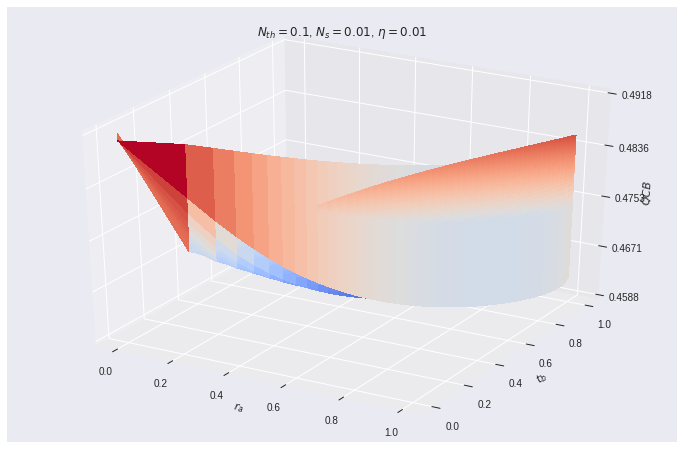

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

df_two = pd.read_csv('../output/expr_two_p51.csv')

RA = np.sqrt(np.linspace(0, 1, 51))
RB = np.sqrt(np.linspace(0, 1, 51))
RA, RB = np.meshgrid(RA, RB)
qcb_pcs = df_two['Helstrom'].values.reshape(RA.shape)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(RA, RB, qcb_pcs, \
                rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('$r_a$')
ax.set_ylabel('$t_b$')
ax.set_zlabel('$QCB$')
ax.set_title('$N_{th}=0.1$, $N_s=0.01$, $\eta=0.01$')

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.4f'))

# fig.colorbar(qcb_pcs, shrink=0.5, aspect=5)
plt.show()